# Import libraries and read data

In [1]:
import pandas as pd
import numpy as np

import plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px

import plotly.graph_objects as go
from plotly.graph_objects import Bar

init_notebook_mode(connected=True)
plotly.offline.init_notebook_mode(connected=True)

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import squarify

sns.set()

In [2]:
# global data
confirmed_global_path = 'COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
deaths_global_path = 'COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
recovered_global_path = 'COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

# U.S. data
confirmed_us_path = 'COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
deaths_us_path = 'COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'

In [3]:
# global data
confirmed_global_df = pd.read_csv(confirmed_global_path)
deaths_global_df = pd.read_csv(deaths_global_path)
recovered_global_df = pd.read_csv(recovered_global_path)

# U.S data
confirmed_us_df = pd.read_csv(confirmed_us_path)
deaths_us_df = pd.read_csv(deaths_us_path)

# Get to know the data:

## Globally confirmed cases:

In [4]:
confirmed_global_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,40,74,84,94,110,110,120,170,174,237
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,104,123,146,174,186,197,212,223,243,259
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,230,264,302,367,409,454,511,584,716,847
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,133,164,188,224,267,308,334,370,376,390
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,3,3,3,4,4,5,7,7,7,8


In [5]:
confirmed_global_df.shape

(256, 75)

## Globally deaths:

In [6]:
deaths_global_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1,1,2,4,4,4,4,4,4,4
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,4,5,5,6,8,10,10,11,15,15
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,17,19,21,25,26,29,31,35,44,58
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,1,3,3,3,6,8,12,14
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,2,2


In [7]:
deaths_global_df.shape

(256, 75)

## Globally recovered cases:

In [8]:
recovered_global_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1,1,2,2,2,2,2,2,5,5
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2,10,17,17,31,31,33,44,52,67
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,65,24,65,29,29,31,31,37,46,61
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,1,1,1,1,1,10,10,10
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [9]:
recovered_global_df.shape

(242, 75)

## U.S. confirmed cases:

In [10]:
confirmed_us_df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,29,32,37,45,51,55,56,58,69,77
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,0,0,0,0,0,0,0,0,2,6
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,31,39,51,64,79,100,127,174,239,286
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,7,17,17,17,19,22,0,0,30,30


In [11]:
confirmed_us_df.shape

(3253, 82)

## U.S. deaths:

In [12]:
deaths_us_df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,1,1,1,1,1,1,1,1,2,3
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,0,0,0,0,0,0,0,0,0,1
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,2,2,2,2,3,3,3,6,8,11
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,0,0,0,0,0,0,0,0,0,0


In [13]:
deaths_us_df.shape

(3253, 83)

## Summary:

The three datasets share the same structure, and have the same fields, one for **confirmed** cases, one for **deaths** cases, and one for **recovered** cases.
Fields descriptioin
* Province/State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.
* Country/Region: country/region name conforming to WHO (will be updated).
* Lat and Long: a coordinates reference for the user.
* Date fields: M/DD/YYYY (UTC), the *cumulative* number of cases up until this date.

It can be seen that the `U.S.` dataset differs from the `global` one, as it has these additional columns: UID, iso2, iso3, code3, FIPS (we'll get to them later)

# Data Preprocessing:

In [14]:
# global data
print(f'Globally confirmed cases: {confirmed_global_df.shape}')
print(f'Globally deaths: {deaths_global_df.shape}')
print(f'Globally recovered cases: {recovered_global_df.shape}')

# U.S. data
print(f'U.S. Confirmed cases: {confirmed_us_df.shape}')
print(f'U.S. deaths: {deaths_us_df.shape}')

Globally confirmed cases: (256, 75)
Globally deaths: (256, 75)
Globally recovered cases: (242, 75)
U.S. Confirmed cases: (3253, 82)
U.S. deaths: (3253, 83)


although the three datasets have the same structure, they are inconsistent, the number of **recovered** cases is different, so I think we should drop it.

@**Qusai** what do you think? (BTW, no way to mention to other users in jupyter lab, google colab has this feature :|)

## 1 - Drop irrelevant columns:
`Lat` and `Long` columns specify the coordinates of the case, we won't be needing this inofrmation right now.

In [15]:
def drop_irrelevant_columns(df, irrelevant_columns):
    new_df = df.drop(columns=irrelevant_columns)
    return new_df

In [16]:
irrelevant_columns = ['Lat', 'Long']

In [17]:
confirmed_global_df = drop_irrelevant_columns(confirmed_global_df, irrelevant_columns)
deaths_global_df = drop_irrelevant_columns(deaths_global_df, irrelevant_columns)
recovered_global_df = drop_irrelevant_columns(recovered_global_df, irrelevant_columns)

In [18]:
confirmed_global_df.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,40,74,84,94,110,110,120,170,174,237
1,NaN,Albania,0,0,0,0,0,0,0,0,...,104,123,146,174,186,197,212,223,243,259
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,230,264,302,367,409,454,511,584,716,847
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,133,164,188,224,267,308,334,370,376,390
4,NaN,Angola,0,0,0,0,0,0,0,0,...,3,3,3,4,4,5,7,7,7,8


In [19]:
deaths_global_df.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1,1,2,4,4,4,4,4,4,4
1,NaN,Albania,0,0,0,0,0,0,0,0,...,4,5,5,6,8,10,10,11,15,15
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,17,19,21,25,26,29,31,35,44,58
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,1,1,1,3,3,3,6,8,12,14
4,NaN,Angola,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,2,2


In [20]:
recovered_global_df.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1,1,2,2,2,2,2,2,5,5
1,NaN,Albania,0,0,0,0,0,0,0,0,...,2,10,17,17,31,31,33,44,52,67
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,65,24,65,29,29,31,31,37,46,61
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,10,10,10
4,NaN,Angola,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


Also, drop columns `UID`, `iso2`, `iso3`, `code3`, `FIPS`, `Admin2`, `Combined_Key` from the `U.S.` data:

In [21]:
irrelevant_columns = ['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Lat', 'Long_', 'Combined_Key']

In [22]:
confirmed_us_df = drop_irrelevant_columns(confirmed_us_df, irrelevant_columns)
deaths_us_df = drop_irrelevant_columns(deaths_us_df, irrelevant_columns)

In [23]:
confirmed_us_df.head()

,Province_State,Country_Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
0,American Samoa,US,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Guam,US,0,0,0,0,0,0,0,0,...,29,32,37,45,51,55,56,58,69,77
2,Northern Mariana Islands,US,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,6
3,Puerto Rico,US,0,0,0,0,0,0,0,0,...,31,39,51,64,79,100,127,174,239,286
4,Virgin Islands,US,0,0,0,0,0,0,0,0,...,7,17,17,17,19,22,0,0,30,30


In [24]:
deaths_us_df.head()

,Province_State,Country_Region,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
0,American Samoa,US,55641,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Guam,US,164229,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,2,3
2,Northern Mariana Islands,US,55144,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Puerto Rico,US,2933408,0,0,0,0,0,0,0,...,2,2,2,2,3,3,3,6,8,11
4,Virgin Islands,US,107268,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


only deaths data has the column `Population`, but it should the same for the confirmed data also.

In [35]:
confirmed_us_df.insert(2, 'Population', deaths_us_df['Population'])

In [36]:
confirmed_us_df.head()

,State,Country,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
0,American Samoa,US,55641,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Guam,US,164229,0,0,0,0,0,0,0,...,29,32,37,45,51,55,56,58,69,77
2,Northern Mariana Islands,US,55144,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,6
3,Puerto Rico,US,2933408,0,0,0,0,0,0,0,...,31,39,51,64,79,100,127,174,239,286
4,Virgin Islands,US,107268,0,0,0,0,0,0,0,...,7,17,17,17,19,22,0,0,30,30


## 2 - Normalize columns' names:
throughout this notebook, we will be quering columns `Province/State`, `Country/Region` a lot! so it would be better to rename them so some thing like `State` and `Country` respectively.

In [27]:
def rename_columns(df, columns_mapping):
    new_df = df.rename(columns=columns_mapping)
    return new_df

In [37]:
columns_mapping = {
    'Province/State': 'State',
    'Province_State': 'State',
    'Country/Region': 'Country',
    'Country_Region': 'Country'
}

In [38]:
# global data
confirmed_global_df = rename_columns(confirmed_global_df, columns_mapping)
deaths_global_df = rename_columns(deaths_global_df, columns_mapping)
recovered_global_df = rename_columns(recovered_global_df, columns_mapping)

# U.S. data
confirmed_us_df = rename_columns(confirmed_us_df, columns_mapping)
deaths_us_df = rename_columns(deaths_us_df, columns_mapping)

### Global data:

In [39]:
confirmed_global_df.head()

,State,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,40,74,84,94,110,110,120,170,174,237
1,NaN,Albania,0,0,0,0,0,0,0,0,...,104,123,146,174,186,197,212,223,243,259
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,230,264,302,367,409,454,511,584,716,847
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,133,164,188,224,267,308,334,370,376,390
4,NaN,Angola,0,0,0,0,0,0,0,0,...,3,3,3,4,4,5,7,7,7,8


In [40]:
deaths_global_df.head()

,State,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1,1,2,4,4,4,4,4,4,4
1,NaN,Albania,0,0,0,0,0,0,0,0,...,4,5,5,6,8,10,10,11,15,15
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,17,19,21,25,26,29,31,35,44,58
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,1,1,1,3,3,3,6,8,12,14
4,NaN,Angola,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,2,2


In [41]:
recovered_global_df.head()

,State,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1,1,2,2,2,2,2,2,5,5
1,NaN,Albania,0,0,0,0,0,0,0,0,...,2,10,17,17,31,31,33,44,52,67
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,65,24,65,29,29,31,31,37,46,61
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,10,10,10
4,NaN,Angola,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


### U.S. data:

In [42]:
confirmed_us_df.head()

,State,Country,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
0,American Samoa,US,55641,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Guam,US,164229,0,0,0,0,0,0,0,...,29,32,37,45,51,55,56,58,69,77
2,Northern Mariana Islands,US,55144,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,6
3,Puerto Rico,US,2933408,0,0,0,0,0,0,0,...,31,39,51,64,79,100,127,174,239,286
4,Virgin Islands,US,107268,0,0,0,0,0,0,0,...,7,17,17,17,19,22,0,0,30,30


In [43]:
deaths_us_df.head()

,State,Country,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
0,American Samoa,US,55641,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Guam,US,164229,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,2,3
2,Northern Mariana Islands,US,55144,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Puerto Rico,US,2933408,0,0,0,0,0,0,0,...,2,2,2,2,3,3,3,6,8,11
4,Virgin Islands,US,107268,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3 - Drop `State` column from the global data:
most records of the global data doesn't have `State` value, so it's better to drop it.

In [44]:
confirmed_global_df = drop_irrelevant_columns(confirmed_global_df, 'State')
deaths_global_df = drop_irrelevant_columns(deaths_global_df, 'State')
recovered_global_df = drop_irrelevant_columns(recovered_global_df, 'State')

In [45]:
confirmed_global_df.head()

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,40,74,84,94,110,110,120,170,174,237
1,Albania,0,0,0,0,0,0,0,0,0,...,104,123,146,174,186,197,212,223,243,259
2,Algeria,0,0,0,0,0,0,0,0,0,...,230,264,302,367,409,454,511,584,716,847
3,Andorra,0,0,0,0,0,0,0,0,0,...,133,164,188,224,267,308,334,370,376,390
4,Angola,0,0,0,0,0,0,0,0,0,...,3,3,3,4,4,5,7,7,7,8


In [46]:
deaths_global_df.head()

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1,1,2,4,4,4,4,4,4,4
1,Albania,0,0,0,0,0,0,0,0,0,...,4,5,5,6,8,10,10,11,15,15
2,Algeria,0,0,0,0,0,0,0,0,0,...,17,19,21,25,26,29,31,35,44,58
3,Andorra,0,0,0,0,0,0,0,0,0,...,1,1,1,3,3,3,6,8,12,14
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,2,2


In [47]:
recovered_global_df.head()

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1,1,2,2,2,2,2,2,5,5
1,Albania,0,0,0,0,0,0,0,0,0,...,2,10,17,17,31,31,33,44,52,67
2,Algeria,0,0,0,0,0,0,0,0,0,...,65,24,65,29,29,31,31,37,46,61
3,Andorra,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,10,10,10
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


## 4 - Aggregate data by countries for global data:
aggregate the number of confirmed cases, number of deaths, and number of reovered cases at each day for each country.

aggregate global data:

In [48]:
def apply_aggregation(df, by_column):
    aggregate_df = df.groupby(by=by_column)\
                        .sum()\
                        .reset_index()
    return aggregate_df

In [49]:
by_column = 'Country'

In [51]:
# global
confirmed_global_agg_df = apply_aggregation(confirmed_global_df, by_column)
deaths_global_agg_df = apply_aggregation(deaths_global_df, by_column)
recovered_global_agg_df = apply_aggregation(recovered_global_df, by_column)
# TODO:
# aggregate the U.S. data by `state`
# confirmed_us_agg_df = apply_aggregation(confirmed_us_df, by_column)
# deaths_us_agg_df = apply_aggregation(deaths_us_df, by_column)

In [52]:
confirmed_global_agg_df.head()

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,40,74,84,94,110,110,120,170,174,237
1,Albania,0,0,0,0,0,0,0,0,0,...,104,123,146,174,186,197,212,223,243,259
2,Algeria,0,0,0,0,0,0,0,0,0,...,230,264,302,367,409,454,511,584,716,847
3,Andorra,0,0,0,0,0,0,0,0,0,...,133,164,188,224,267,308,334,370,376,390
4,Angola,0,0,0,0,0,0,0,0,0,...,3,3,3,4,4,5,7,7,7,8


In [53]:
deaths_global_agg_df.head()

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1,1,2,4,4,4,4,4,4,4
1,Albania,0,0,0,0,0,0,0,0,0,...,4,5,5,6,8,10,10,11,15,15
2,Algeria,0,0,0,0,0,0,0,0,0,...,17,19,21,25,26,29,31,35,44,58
3,Andorra,0,0,0,0,0,0,0,0,0,...,1,1,1,3,3,3,6,8,12,14
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,2,2


In [54]:
recovered_global_agg_df.head()

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1,1,2,2,2,2,2,2,5,5
1,Albania,0,0,0,0,0,0,0,0,0,...,2,10,17,17,31,31,33,44,52,67
2,Algeria,0,0,0,0,0,0,0,0,0,...,65,24,65,29,29,31,31,37,46,61
3,Andorra,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,10,10,10
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


aggregate U.S. data:

In [58]:
by_columns = ['Country', 'State']

In [59]:
confirmed_us_agg_df = apply_aggregation(confirmed_us_df, by_columns)
deaths_us_agg_df = apply_aggregation(deaths_us_df, by_columns)

In [60]:
confirmed_us_agg_df.head()

,Country,State,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
0,US,Alabama,4903185,0,0,0,0,0,0,0,...,196,242,381,517,587,694,825,899,987,1060
1,US,Alaska,731545,0,0,0,0,0,0,0,...,30,34,41,56,58,85,102,114,119,132
2,US,American Samoa,55641,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,US,Arizona,7278717,0,0,0,0,1,1,1,...,235,326,401,508,665,773,919,1157,1289,1530
4,US,Arkansas,3017804,0,0,0,0,0,0,0,...,192,219,280,335,381,409,426,473,523,584


In [61]:
deaths_us_agg_df.head()

,Country,State,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
0,US,Alabama,4903185,0,0,0,0,0,0,0,...,0,0,1,1,4,4,10,10,23,27
1,US,Alaska,731545,0,0,0,0,0,0,0,...,0,0,1,1,1,2,2,3,3,3
2,US,American Samoa,55641,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,US,Arizona,7278717,0,0,0,0,0,0,0,...,2,5,6,8,13,15,17,20,24,29
4,US,Arkansas,3017804,0,0,0,0,0,0,0,...,0,2,2,2,3,5,6,7,8,10


## 5 - create `Population` dataframe for the `U.S.` data:

Later, we will convert the data to time series structure, and the value of `Population` shouldn't be in a time series data, as it doesn't change over time, it's rather a characteristic of the state.

In [83]:
us_population_df = confirmed_us_agg_df[['Country', 'State', 'Population']]

In [86]:
confirmed_us_agg_df = drop_irrelevant_columns(confirmed_us_agg_df, ['Population'])
deaths_us_agg_df = drop_irrelevant_columns(deaths_us_agg_df, ['Population'])

In [87]:
confirmed_us_agg_df.head()

,Country,State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
0,US,Alabama,0,0,0,0,0,0,0,0,...,196,242,381,517,587,694,825,899,987,1060
1,US,Alaska,0,0,0,0,0,0,0,0,...,30,34,41,56,58,85,102,114,119,132
2,US,American Samoa,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,US,Arizona,0,0,0,0,1,1,1,1,...,235,326,401,508,665,773,919,1157,1289,1530
4,US,Arkansas,0,0,0,0,0,0,0,0,...,192,219,280,335,381,409,426,473,523,584


In [88]:
deaths_us_agg_df.head()

,Country,State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
0,US,Alabama,0,0,0,0,0,0,0,0,...,0,0,1,1,4,4,10,10,23,27
1,US,Alaska,0,0,0,0,0,0,0,0,...,0,0,1,1,1,2,2,3,3,3
2,US,American Samoa,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,US,Arizona,0,0,0,0,0,0,0,0,...,2,5,6,8,13,15,17,20,24,29
4,US,Arkansas,0,0,0,0,0,0,0,0,...,0,2,2,2,3,5,6,7,8,10


## 5 - Restructe the Data:
convert the data into an easier structure, add column `date`, and change the columns to br rows (for easier manipulation)

In [79]:
date_columns = confirmed_global_agg_df.filter(regex='\d{1,2}/\d{1,2}/\d{1,4}').columns.values

In [100]:
def construct_date_df(df, date_column_name, copy_columns, value_column_name):
    
    data = {}
    
    data['date'] = date_column_name
    
    for column in copy_columns:
        data[column] = df[column]
    
    data[value_column_name] = df[date_column_name]
    
    date_df = pd.DataFrame(data=data)
    
    return date_df

In [101]:
# global data
confirmed_global_date_frames = [construct_date_df(confirmed_global_agg_df, date_column, ['Country'], 'confirmed') for date_column in date_columns]
deaths_global_date_frames = [construct_date_df(deaths_global_agg_df, date_column, ['Country'], 'deaths') for date_column in date_columns]
recovered_global_date_frames = [construct_date_df(recovered_global_agg_df, date_column, ['Country'], 'recovered') for date_column in date_columns]

# U.S. data
confirmed_us_date_frames = [construct_date_df(confirmed_us_agg_df, date_column, ['Country', 'State'], 'confirmed') for date_column in date_columns]
deaths_us_date_frames = [construct_date_df(deaths_us_agg_df, date_column, ['Country', 'State'], 'deaths') for date_column in date_columns]

In [102]:
# global data
confirmed_global_time_series = pd.concat(confirmed_global_date_frames)
deaths_global_time_series = pd.concat(deaths_global_date_frames)
recovered_global_time_series = pd.concat(recovered_global_date_frames)

# U.S. data
confirmed_us_time_series = pd.concat(confirmed_us_date_frames)
deaths_us_time_series = pd.concat(deaths_us_date_frames)

In [103]:
confirmed_global_time_series.head()

,date,Country,confirmed
0,1/22/20,Afghanistan,0
1,1/22/20,Albania,0
2,1/22/20,Algeria,0
3,1/22/20,Andorra,0
4,1/22/20,Angola,0


In [104]:
deaths_global_time_series.head()

,date,Country,deaths
0,1/22/20,Afghanistan,0
1,1/22/20,Albania,0
2,1/22/20,Algeria,0
3,1/22/20,Andorra,0
4,1/22/20,Angola,0


In [105]:
recovered_global_time_series.head()

,date,Country,recovered
0,1/22/20,Afghanistan,0
1,1/22/20,Albania,0
2,1/22/20,Algeria,0
3,1/22/20,Andorra,0
4,1/22/20,Angola,0


In [106]:
confirmed_us_time_series.head()

,date,Country,State,confirmed
0,1/22/20,US,Alabama,0
1,1/22/20,US,Alaska,0
2,1/22/20,US,American Samoa,0
3,1/22/20,US,Arizona,0
4,1/22/20,US,Arkansas,0


In [107]:
deaths_us_time_series.head()

,date,Country,State,deaths
0,1/22/20,US,Alabama,0
1,1/22/20,US,Alaska,0
2,1/22/20,US,American Samoa,0
3,1/22/20,US,Arizona,0
4,1/22/20,US,Arkansas,0


in the rest of the notebook, we will focus on the following three dataframes:
- `confirmed_time_series`: time series of the confirmed cases.
- `deaths_time_series`: time series of the deaths.
- `recovered_time_series`: time series of the recovered cases.

A *time series* data shows the change in a *statiscal variable* according to *time*.<br>
Each row in the previous time series is a tuple of date, country, and measure, the measure represents the cumulative sum in the country, up until the date.

## 6 - Focus on *Outbreaks*:
We will focus in this notebook only on countries with high **death tolls**, countires that are nearly affected by the pandemic will be discarded.

In [116]:
last_day = deaths_global_time_series['date'].values[-1]

In [122]:
most_affected_countries = deaths_global_time_series[deaths_global_time_series['date'] == last_day]\
                                                                            .sort_values(by='deaths', ascending=False)\
                                                                            [:10]

In [123]:
most_affected_countries

,date,Country,deaths
84,4/1/20,Italy,13155
153,4/1/20,Spain,9387
168,4/1/20,US,4757
61,4/1/20,France,4043
36,4/1/20,China,3316
80,4/1/20,Iran,3036
172,4/1/20,United Kingdom,2357
119,4/1/20,Netherlands,1175
65,4/1/20,Germany,920
16,4/1/20,Belgium,828


In [124]:
most_affected_countries_names = most_affected_countries['Country'].values

Create time series for most affected countries:

In [125]:
most_deaths_time_series = deaths_global_time_series[deaths_global_time_series['Country'].isin(most_affected_countries_names)]

In [126]:
most_deaths_time_series.head()

,date,Country,deaths
16,1/22/20,Belgium,0
36,1/22/20,China,17
61,1/22/20,France,0
65,1/22/20,Germany,0
80,1/22/20,Iran,0


In [127]:
most_confirmed_time_series = confirmed_global_time_series[confirmed_global_time_series['Country'].isin(most_affected_countries_names)]

In [128]:
most_confirmed_time_series.head()

,date,Country,confirmed
16,1/22/20,Belgium,0
36,1/22/20,China,548
61,1/22/20,France,0
65,1/22/20,Germany,0
80,1/22/20,Iran,0


In [129]:
most_recovered_time_series = recovered_global_time_series[recovered_global_time_series['Country'].isin(most_affected_countries_names)]

In [130]:
most_recovered_time_series.head()

,date,Country,recovered
16,1/22/20,Belgium,0
36,1/22/20,China,28
61,1/22/20,France,0
65,1/22/20,Germany,0
80,1/22/20,Iran,0


# Data Visualization:

## Line Chart:

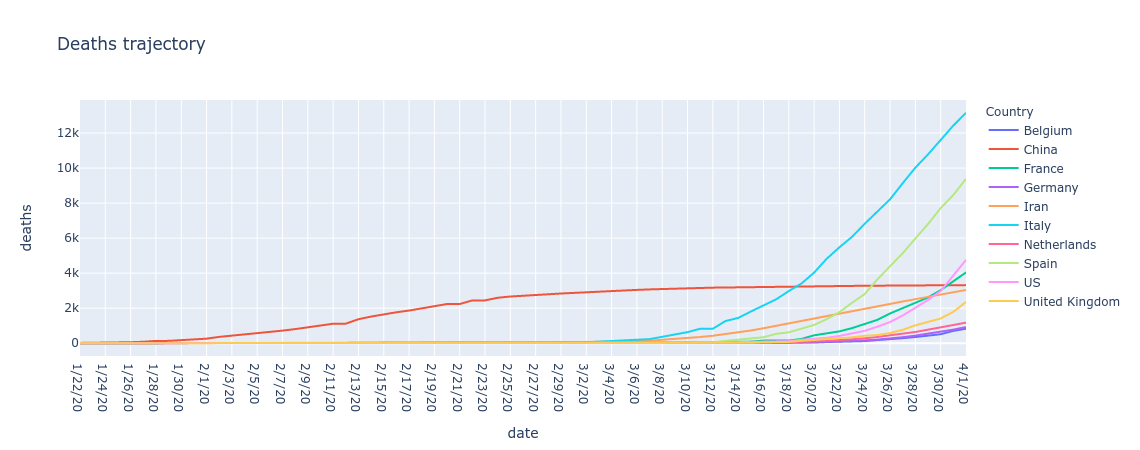

In [132]:
fig = px.line(data_frame=most_deaths_time_series, x='date', y='deaths', color='Country', line_group='Country', title='Deaths trajectory')
fig.show()

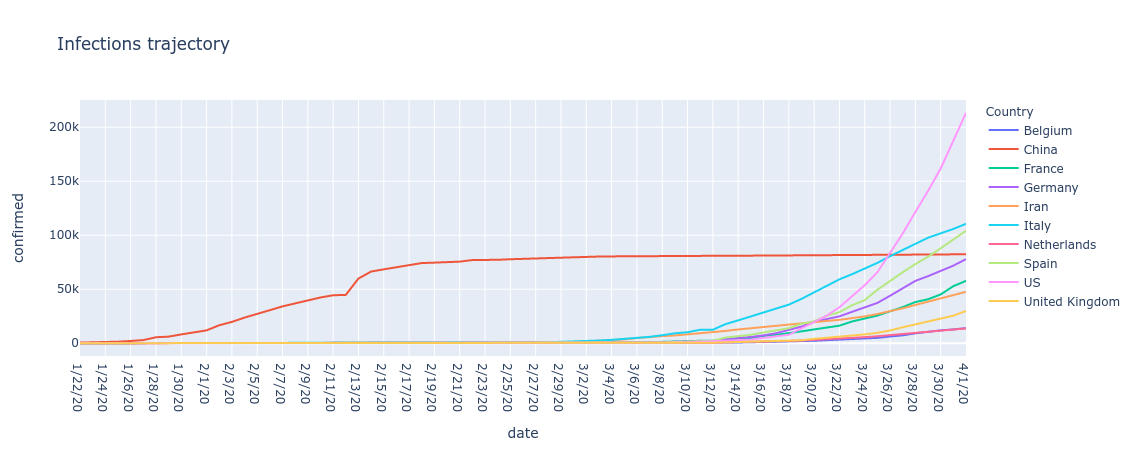

In [133]:
fig = px.line(data_frame=most_confirmed_time_series, x='date', y='confirmed', color='Country', line_group='Country', title='Infections trajectory')
fig.show()

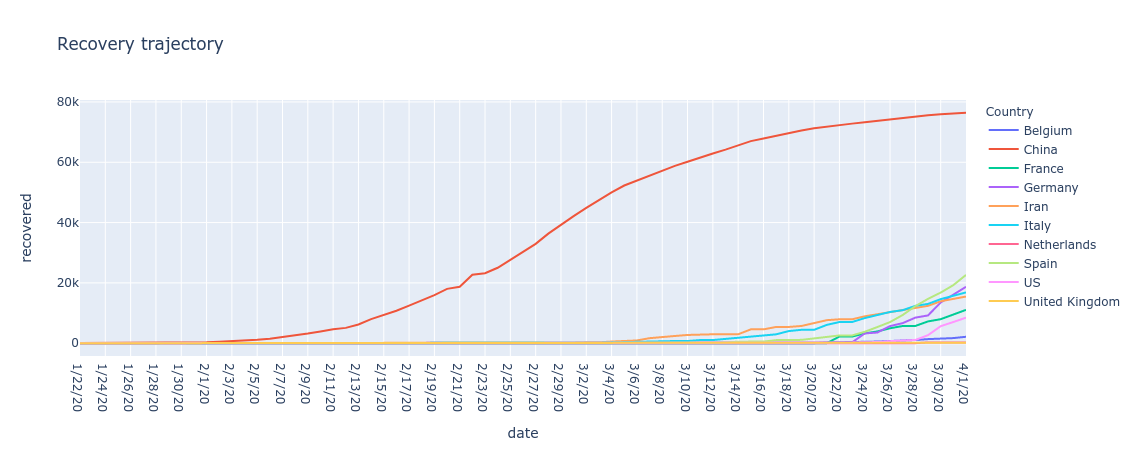

In [134]:
fig = px.line(data_frame=most_recovered_time_series, x='date', y='recovered', color='Country', line_group='Country', title='Recovery trajectory')
fig.show()

`TODO`:
- investigate the date of the lockdown applied by each country, and study how it affected the growth of cases (in general)
- try to model the grow of countries by *Mathematical functions*, China for example is like the `sigmoid` function, while other counter countries like Italy, Spain, ... are more like `exponential` function (good resource for this: [Estimating actual COVID 19 cases (novel corona virus infections) in an area based on deaths](https://www.youtube.com/watch?v=mCa0JXEwDEk))

## Choropleth Map:

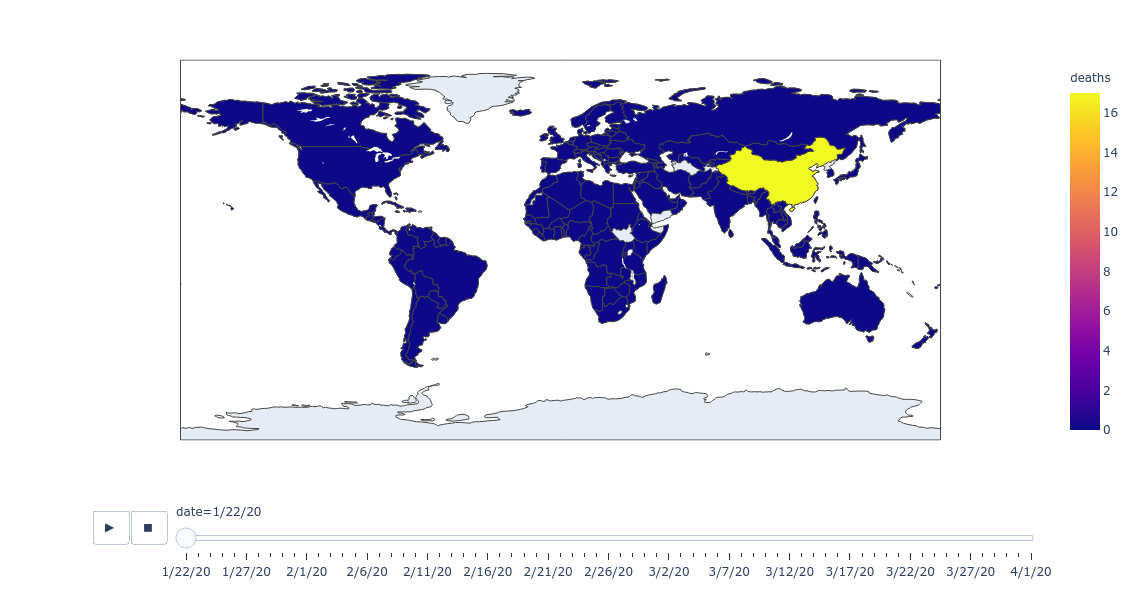

In [135]:
fig = px.choropleth(data_frame=deaths_global_time_series, locations='Country',
                    locationmode='country names', color='deaths',
                    hover_name='deaths', animation_frame='date',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    width=1000, height=600)
fig.show()

## U.S. Choropleth:

In [143]:
lookup_df = pd.read_csv('COVID-19/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv')

In [144]:
lookup_df = rename_columns(lookup_df, {
    'Province_State': 'State',
    'Country_Region': 'Region'
})

In [158]:
lookup_df.dropna(inplace=True)

In [159]:
lookup_df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,State,Region,Lat,Long_,Combined_Key
415,84001001,US,USA,840.0,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US"
416,84001003,US,USA,840.0,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US"
417,84001005,US,USA,840.0,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US"
418,84001007,US,USA,840.0,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US"
419,84001009,US,USA,840.0,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US"


In [155]:
confirmed_us_time_series.head()

,date,Country,State,confirmed
0,1/22/20,US,Alabama,0
1,1/22/20,US,Alaska,0
2,1/22/20,US,American Samoa,0
3,1/22/20,US,Arizona,0
4,1/22/20,US,Arkansas,0


In [166]:
confirmed_us_time_series.join(lookup_df[['State', 'FIPS']].set_index('State'))

,date,Country,State,confirmed,FIPS


In [170]:
confirmed_us_time_series.merge(lookup_df[['State', 'FIPS']], left_on='State', right_on='State', how='inner')

,date,Country,State,confirmed,FIPS
0,1/22/20,US,Alabama,0,1001.0
1,1/22/20,US,Alabama,0,1003.0
2,1/22/20,US,Alabama,0,1005.0
3,1/22/20,US,Alabama,0,1007.0
4,1/22/20,US,Alabama,0,1009.0
5,1/22/20,US,Alabama,0,1011.0
6,1/22/20,US,Alabama,0,1013.0
7,1/22/20,US,Alabama,0,1015.0
8,1/22/20,US,Alabama,0,1017.0
9,1/22/20,US,Alabama,0,1019.0


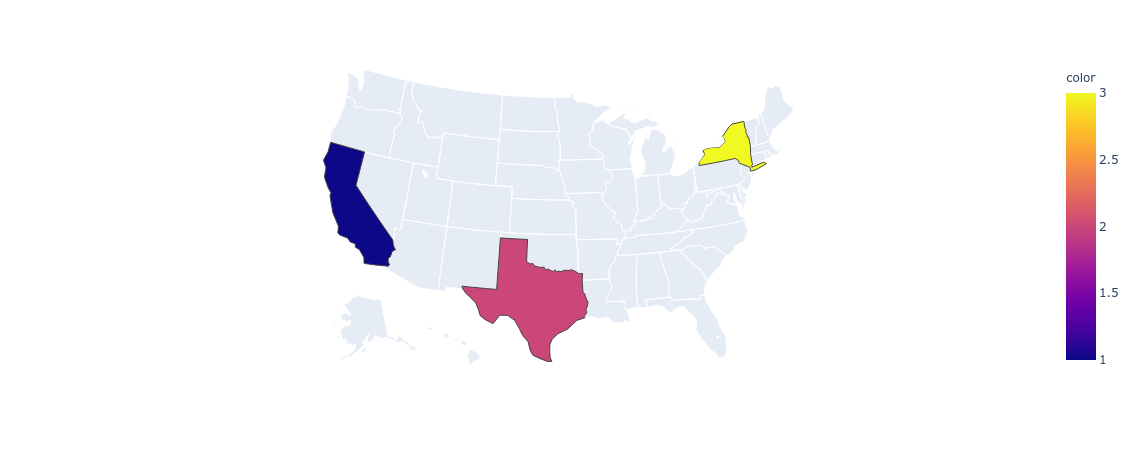

In [138]:
fig = px.choropleth(locations=["CA", "TX", "NY"],
                    locationmode="USA-states",
                    color=[1,2,3],
                    scope="usa")
fig.show()

## Bubble Map:

In [ ]:
fig = px.scatter_geo(data_frame=deaths_time_series, locations='Country',
                     locationmode='country names', color='deaths',
                     hover_name='deaths', animation_frame='date', size='deaths',
                     color_continuous_scale=px.colors.sequential.Plasma,
                     width=1000, height=600)
fig.show()